In [ ]:
import configparser
import nltk

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
config = configparser.ConfigParser()
config.read("config.ini")
name = str(config['Files']['file']) 


In [ ]:
df = pd.read_json(name  + ".json" )

In [ ]:
df = df[["date","message"]]
df

,date,message
0,2022-11-18 16:16:20+00:00,ВСУ В ХЕРСОНЕ РАЗДАЮТ ПОВЕСТКИ? \nПОЧЕМУ ЭТОГО...
1,2022-11-18 09:15:39+00:00,"«ДИСЦИПЛИНА ПРЕВЫШЕ ВСЕГО». СОРОК ЛЕТ НАЗАД, П..."
2,2022-11-18 06:11:54+00:00,"БАТЯ ГЕНЕРАЛА СУРОВИКИНА, ОКАЗЫВАЕТСЯ, СБИЛ ТР..."
3,2022-11-17 17:10:01+00:00,"ДОНБАСС СЕРДЦЕМ НАШ, ОСТАЛЬНЫЕ ТЕРРИТОРИИ БУДЕ..."
4,2022-11-17 16:30:02+00:00,ИЗ УПРАВЛЯЮЩЕГО РЕСТОРАНАМИ — В ВОЕНКОРЫ. \n\n...
...,...,...
995,2022-04-21 17:25:26+00:00,
996,2022-04-20 18:43:15+00:00,
997,2022-04-20 13:15:00+00:00,"ЧЕМ БЫСТРЕЕ МЫ ПОЙМЁМ, ЧТО ПРОТИВ НАС ВОЮЕТ НА..."
998,2022-04-20 13:00:08+00:00,ПОЧЕМУ БЫ ЛДНР НЕ ОБРАТИТЬСЯ К НАМ ПО ПОВОДУ С...


In [ ]:
df = df.dropna()


In [ ]:
df["date"] = df["date"].dt.strftime('%m')

In [37]:
df_filtered = df[df["date"].dt.strftime('%m%Y') == '102022']



In [38]:
df_filtered.head()

,date,message
97,2022-10-31 18:01:23+00:00,"ВСЁ ХОРОШО, УКРАИНА ДАСТ РОССИИ ЧЕСТНОЕ СЛОВО,..."
98,2022-10-31 17:56:58+00:00,В 21:05 смотрите программу «Военный курьер». ...
99,2022-10-31 14:12:18+00:00,"УКРАИНА - НЕИСПРАВИМЫЙ ЛЖЕЦ, ЛУЧШИЙ УЧЕНИК ЗАП..."
100,2022-10-31 12:31:16+00:00,"УДАРЫ ПО ДОНЕЦКУ – ЭТО ЧИСТЫЙ САДИЗМ, \nВОТ УЖ..."
101,2022-10-31 10:24:20+00:00,ХЕРСОНСКАЯ ЭЛЕГАНТНОСТЬ И КОЛЧЕНОГОСТЬ ПАВЛОВК...


In [39]:
df_filtered["date"] = df_filtered["date"].dt.strftime('%d')

df2 = df.groupby(['date'])['message'].count()
df3 = df_filtered.groupby(['date'])['message'].count()

/tmp/ipykernel_3128/263127519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["date"] = df_filtered["date"].dt.strftime('%d')
/tmp/ipykernel_3128/263127519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = df["date"].dt.strftime('%m')


In [40]:
df3.head()

date
01     8
02     6
03     4
04     4
05    11
Name: message, dtype: int64

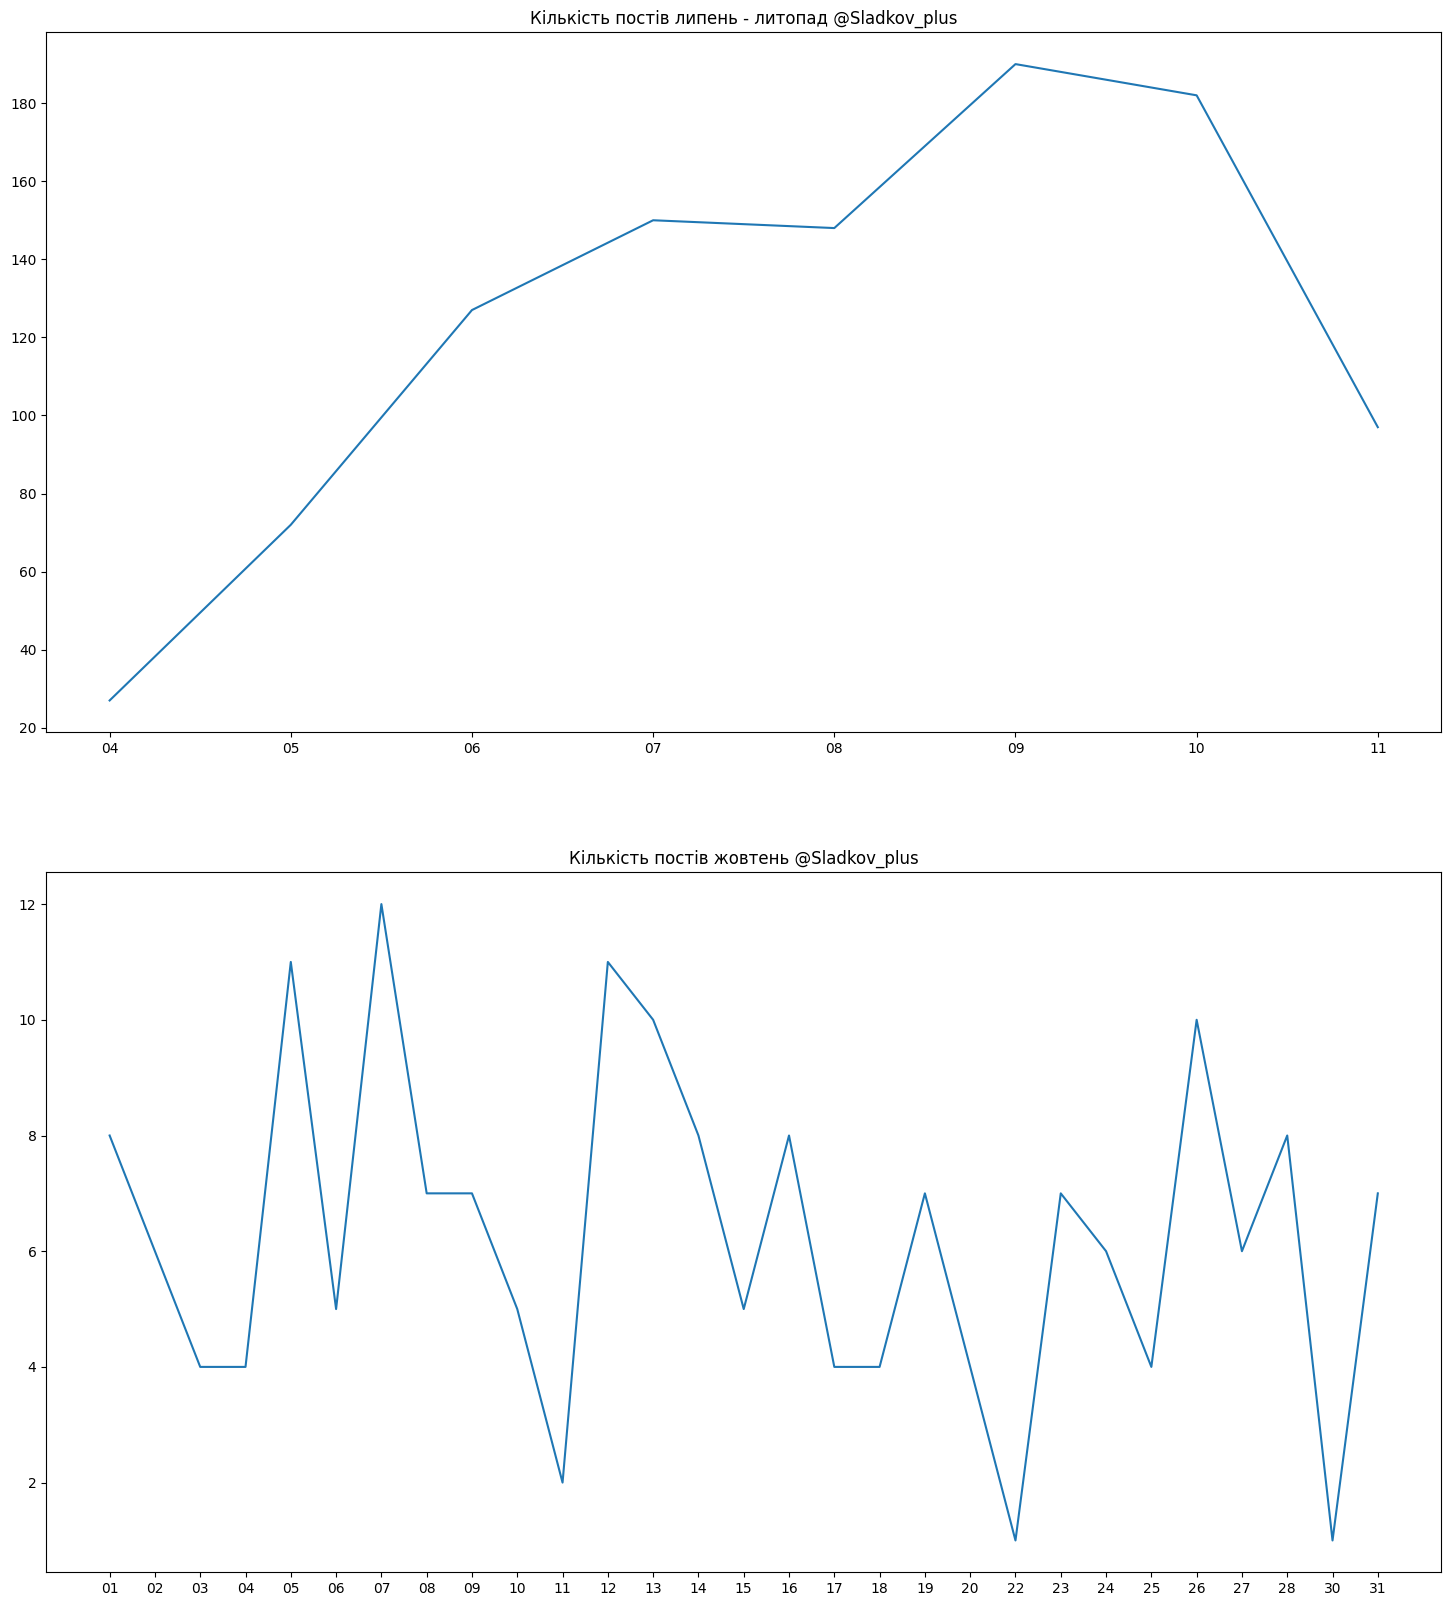

In [41]:


fig, ax = plt.subplots(2,figsize=(18,20))


ax[0].plot(df2);
ax[0].set_title('Кількість постів липень - литопад @' + name);

ax[1].plot(df3);
ax[1].set_title('Кількість постів жовтень @' + name);

plt.show()

In [7]:
s ='МАКРОНА ЩЕЛКНУЛИ ПО НОСУ БЕСПИЛОТЧИКИ ОБТФ «КАСКАД» МВД ДНР! \n\nПарни в районе Павловки лупят артиллерию супостат. \nСегодня передали привет французам и Макрону и разбили «Ланцетом» хваленую французскую гаубицу «Цезарь». \nПривет Парижу! \nВезите ещё!'
s

'МАКРОНА ЩЕЛКНУЛИ ПО НОСУ БЕСПИЛОТЧИКИ ОБТФ «КАСКАД» МВД ДНР! \n\nПарни в районе Павловки лупят артиллерию супостат. \nСегодня передали привет французам и Макрону и разбили «Ланцетом» хваленую французскую гаубицу «Цезарь». \nПривет Парижу! \nВезите ещё!'

In [14]:
from nltk.tokenize import sent_tokenize, word_tokenize

print([word_tokenize(t, language='russian') for t in sent_tokenize(s)])

[['МАКРОНА', 'ЩЕЛКНУЛИ', 'ПО', 'НОСУ', 'БЕСПИЛОТЧИКИ', 'ОБТФ', '«', 'КАСКАД', '»', 'МВД', 'ДНР', '!'], ['Парни', 'в', 'районе', 'Павловки', 'лупят', 'артиллерию', 'супостат', '.'], ['Сегодня', 'передали', 'привет', 'французам', 'и', 'Макрону', 'и', 'разбили', '«', 'Ланцетом', '»', 'хваленую', 'французскую', 'гаубицу', '«', 'Цезарь', '»', '.'], ['Привет', 'Парижу', '!'], ['Везите', 'ещё', '!']]


In [16]:

import pymorphy2
morph = pymorphy2.MorphAnalyzer()


def lemmatize(words):
    res = list()
    for word in words:
        p = morph.parse(word)[0]
        res.append(p.normal_form)

    return res


l = lemmatize(arr2)
print(l)

['макрон', 'щёлкнуть', 'по', 'нос', 'беспилотчик', 'обтф', '«', 'каскад', '»', 'мвд', 'днр', '!', 'парень', 'в', 'район', 'павловка', 'лупить', 'артиллерия', 'супостат', '.', 'сегодня', 'передать', 'привет', 'француз', 'и', 'макрон', 'и', 'разбить', '«', 'ланцет', '»', 'хвалёный', 'французский', 'гаубица', '«', 'цезарь', '»', '.', 'привет', 'париж', '!', 'везти', 'ещё', '!']


In [17]:
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('russian')
stop_words.extend(["это", "https", "me", "которые"])
res = []

for w in l:
    if w not in stop_words:
        res.append(w)

In [18]:
print(res)

['макрон', 'щёлкнуть', 'нос', 'беспилотчик', 'обтф', '«', 'каскад', '»', 'мвд', 'днр', '!', 'парень', 'район', 'павловка', 'лупить', 'артиллерия', 'супостат', '.', 'сегодня', 'передать', 'привет', 'француз', 'макрон', 'разбить', '«', 'ланцет', '»', 'хвалёный', 'французский', 'гаубица', '«', 'цезарь', '»', '.', 'привет', 'париж', '!', 'везти', 'ещё', '!']
